<a href="https://colab.research.google.com/github/gabrielasenareis/python-basico/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving anova.csv to anova.csv


In [3]:
tratamento = pd.read_csv('anova.csv')
tratamento.shape

(24, 1)

In [4]:
tratamento.head()

,Sexo;Remedio;Horas
0,F;A;5
1,F;A;10
2,F;A;7
3,F;A;7
4,M;A;7


In [5]:
tratamento = tratamento['Sexo;Remedio;Horas'].str.split(';', expand=True)
tratamento

,0,1,2
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7
5,M,A,6
6,M,A,9
7,M,A,9
8,F,B,5
9,F,B,5


In [8]:
tratamento.columns = ['Sexo', 'Remédio', 'Horas']
tratamento

,Sexo,Remédio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7
5,M,A,6
6,M,A,9
7,M,A,9
8,F,B,5
9,F,B,5


In [12]:
print(tratamento['Remédio'].isnull().sum())

0


In [19]:
tratamento['Remédio'] = tratamento['Remédio'].str.strip()
print(tratamento['Remédio'].unique())

['A' 'B' 'C']


In [22]:
df = pd.DataFrame(tratamento)

In [25]:
print(df['Horas'].dtype)

object


In [26]:
df['Horas'] = pd.to_numeric(df['Horas'])
print(df['Horas'].dtype)

int64


<Axes: title={'center': 'Horas'}, xlabel='[Remédio]'>

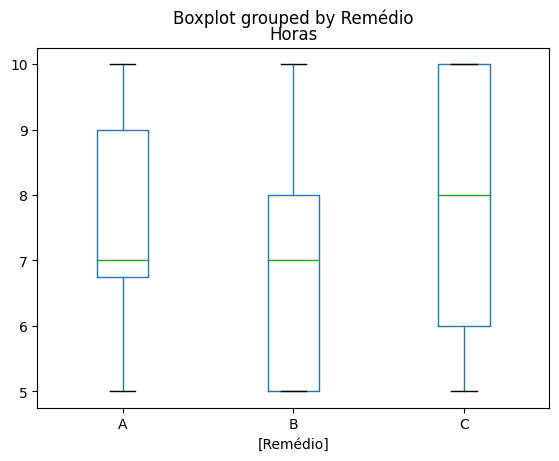

In [29]:
df.boxplot( by = 'Remédio', grid = False)

In [34]:
# vou criar um modelo de regressão linear e executar o teste de anova

modelo1 = ols( 'Horas ~ Sexo * Remédio', data = df).fit()
resultado1 = sm.stats.anova_lm(modelo1)
resultado1
# o pvalue é maior do que 0.05 provando que não há evidencias contra a hipótese nula
# de que não existem diferenças significativas

,df,sum_sq,mean_sq,F,PR(>F)
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remédio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo:Remédio,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [37]:
# se houvesse diferença significativa o teste de tukey seria executado
# para ver onde está a diferença
mc = MultiComparison(df['Horas'], df['Remédio'])
resultado_teste = mc.tukeyhsd()

print(resultado_teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     A      B   -0.625 0.7991 -3.081 1.831  False
     A      C    0.375 0.9219 -2.081 2.831  False
     B      C      1.0 0.5689 -1.456 3.456  False
-------------------------------------------------
